# Sprint 1 - Grupo 2

Este documento corresponde al **Sprint 1** del Grupo 2. A continuación se detallan las tareas incluidas en este sprint:

- Explorar dataset y segmentar clientes
- Estimar tasa de conversión por segmento
- Planteamiento de objetivos analíticos (retención, respuesta, valor esperado)

# Librerias Usadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler


# Carga de documento a trabajar y data Frame Inicial 

In [2]:
def cargar_datos_limpios(ruta='../Data/bancoML.csv'):
    df = pd.read_csv(ruta)
    # Ejemplo de limpieza básica: eliminar duplicados y resetear índice
    df = df.drop_duplicates().reset_index(drop=True)
    # Eliminar columnas completamente vacías
    df = df.dropna(axis=1, how='all')
    # Eliminar filas completamente vacías
    df = df.dropna(axis=0, how='all')
    # # Rellenar valores numéricos faltantes con la mediana
    # num_cols = df.select_dtypes(include=[np.number]).columns
    # df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    # # Rellenar valores categóricos faltantes con el modo
    # cat_cols = df.select_dtypes(include=['object', 'category']).columns
    # for col in cat_cols:
    #     df[col] = df[col].fillna(df[col].mode()[0])
    # # Eliminar espacios en nombres de columnas
    # df.columns = df.columns.str.strip()
    return df

# Exploracion Incial

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10045 entries, 0 to 10044
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10045 non-null  int64 
 1   job        10045 non-null  object
 2   marital    10045 non-null  object
 3   education  10045 non-null  object
 4   default    10045 non-null  object
 5   balance    10045 non-null  int64 
 6   housing    10045 non-null  object
 7   loan       10045 non-null  object
 8   contact    10045 non-null  object
 9   day        10045 non-null  int64 
 10  month      10045 non-null  object
 11  duration   10045 non-null  int64 
 12  campaign   10045 non-null  int64 
 13  pdays      10045 non-null  int64 
 14  previous   10045 non-null  int64 
 15  poutcome   10045 non-null  object
 16  deposit    10045 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.3+ MB

Estadísticas descriptivas:


,age,balance,day,duration,campaign,pdays,previous
count,10045.000000,10045.000000,10045.000000,10045.000000,10045.000000,10045.000000,10045.000000
mean,41.298158,1531.028970,15.655351,372.855450,2.507417,51.612942,0.842708
std,11.904982,3249.941194,8.436983,348.808465,2.737898,108.551981,2.323830
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,126.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,555.000000,15.000000,256.000000,2.000000,-1.000000,0.000000
75%,49.000000,1717.000000,22.000000,495.000000,3.000000,41.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000



Valores nulos por columna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Distribución de la variable categórica 'job':
job
management       2323
blue-collar      1748
technician       1620
admin.           1209
services          835
retired           709
self-employed     359
student           328
unemployed        319
entrepreneur      291
housemaid         242
unknown            62
Name: count, dtype: int64

Distribución de la variable categórica 'marital':
marital
married     5723
single      3168
divorced    1154
Name: count, dtype: int64

Distribución de la variable categórica 'education':
education
secondary    4926
tertiary     3313
primary      1352
unknown       454
Name: count, dtype: int64

Distribución de la variable categórica 'default':
default
no     

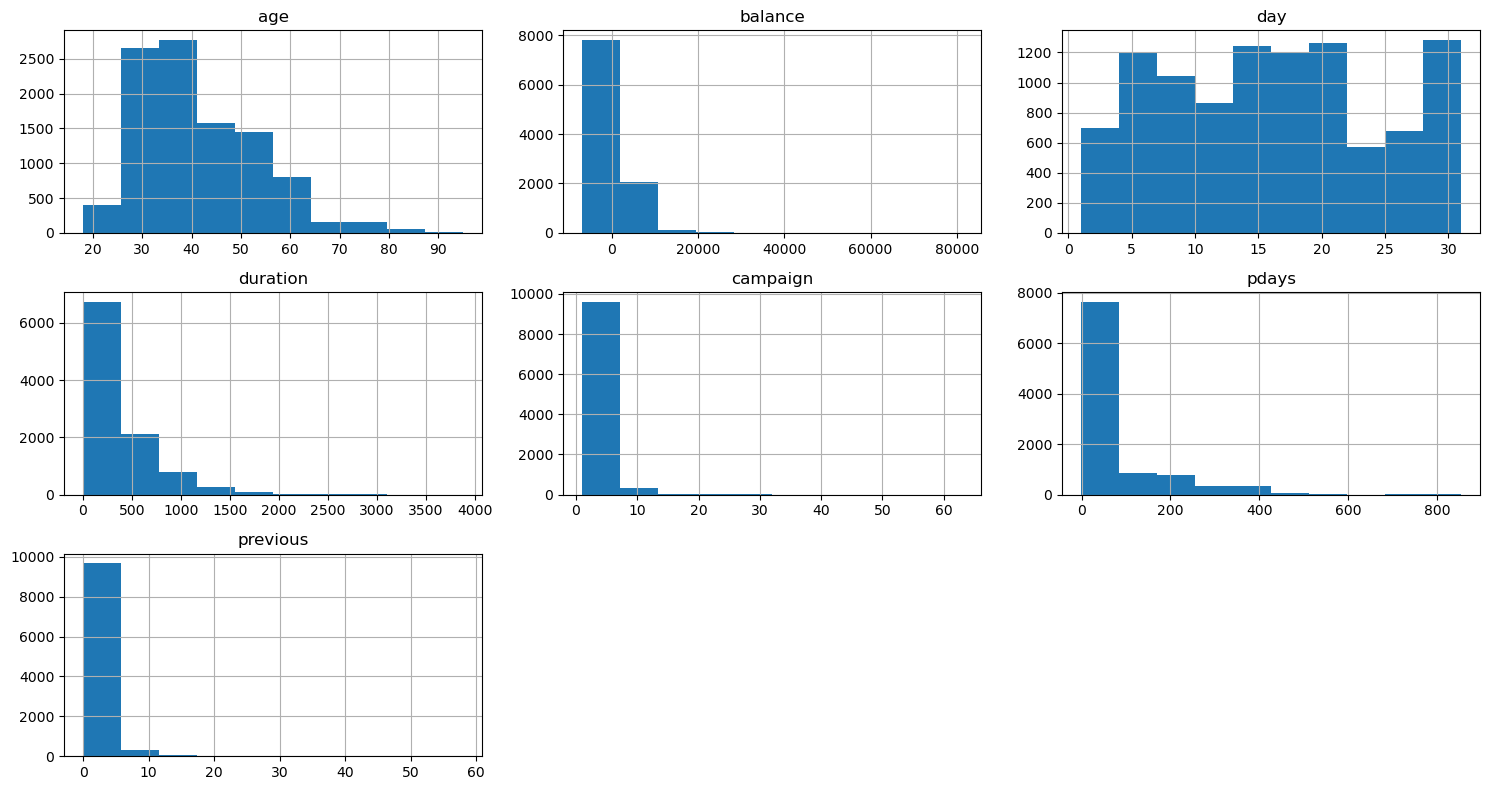

In [3]:
# Cargar el dataframe inicial usando la función definida
df = cargar_datos_limpios()

# Vista general de las primeras filas
display(df.head())

# Información general del dataframe
print("Información general:")
df.info()

# Estadísticas descriptivas de variables numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Recuento de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Distribución de variables categóricas (si existen)
cat_cols = df.select_dtypes(include=['object']).columns.drop('deposit')  # Excluir variable objetivo
for col in cat_cols:
    print(f"\nDistribución de la variable categórica '{col}':")
    print(df[col].value_counts())

# Histograma de variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(15, 8))
plt.tight_layout()
plt.show()

# Segmentaicon de clientes 

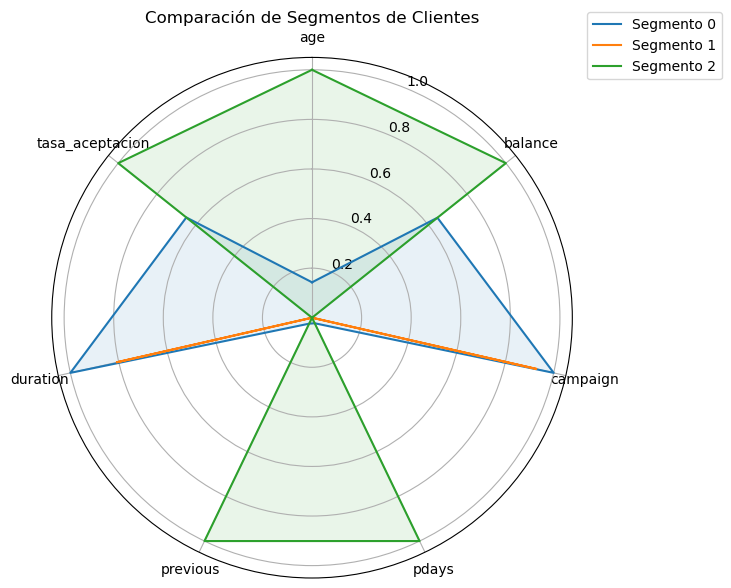

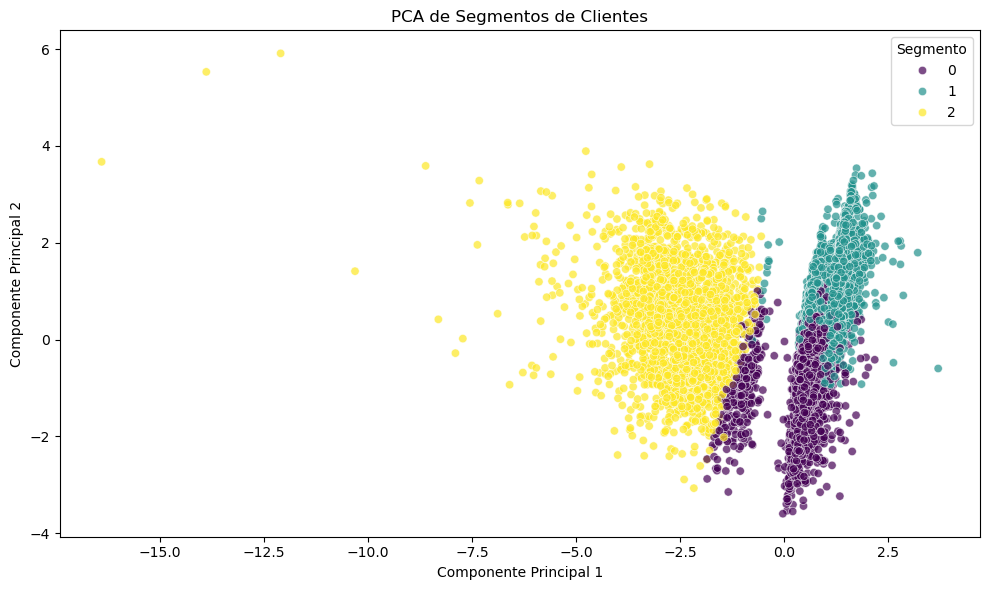

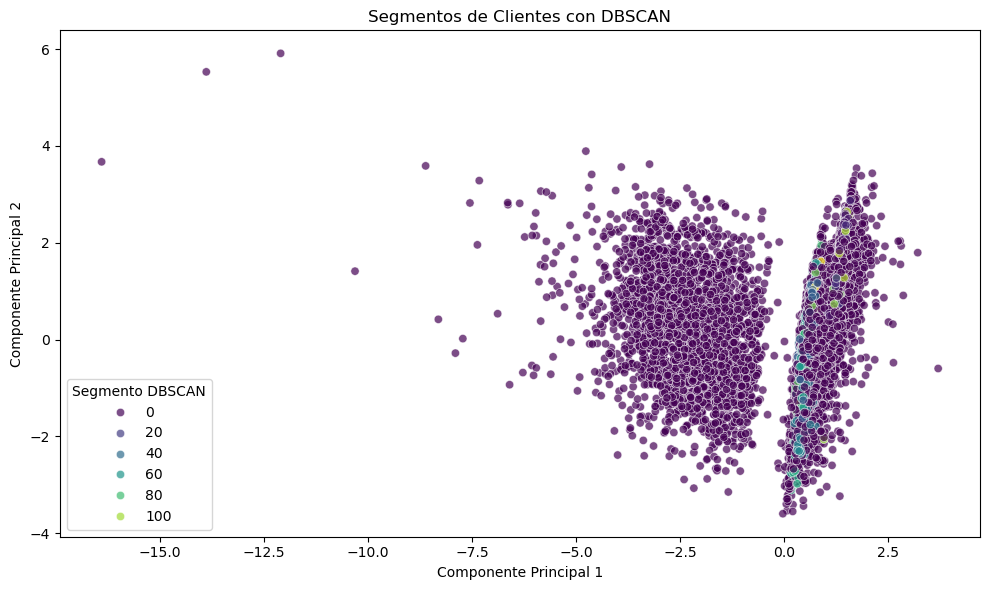

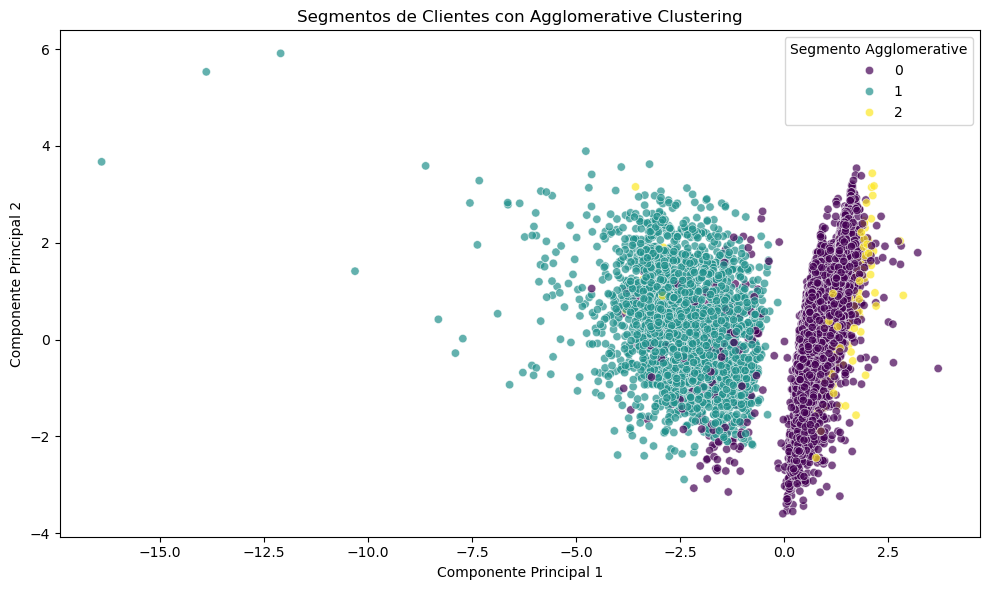


Resumen de Segmentos KMeans:


,age,balance,campaign,pdays,previous,duration,tasa_aceptacion
segmento,,,,,,,
0,-0.01,0.02,0.07,-0.43,-0.32,381.98,0.52
1,-0.02,-0.09,0.05,-0.48,-0.36,375.89,0.28
2,0.05,0.08,-0.22,1.53,1.14,350.31,0.65



Resumen de Segmentos DBSCAN:


,age,balance,campaign,pdays,previous,duration,tasa_aceptacion
dbscan_segmento,,,,,,,
-1,0.11,0.09,0.07,0.15,0.11,371.72,0.50
0,-0.22,-0.25,-0.24,-0.48,-0.36,325.37,0.16
1,-0.71,-0.34,-0.32,-0.48,-0.36,350.18,0.16
2,-0.23,-0.30,-0.29,-0.48,-0.36,379.03,0.21
3,-1.04,-0.29,-0.25,-0.48,-0.36,544.00,0.33
...,...,...,...,...,...,...,...
112,0.85,-0.42,-0.19,-0.48,-0.36,283.80,0.20
113,-0.21,-0.40,-0.40,-0.48,-0.36,291.00,0.00
114,-0.43,-0.19,-0.48,-0.48,-0.36,633.80,0.20



Resumen de Segmentos Agglomerative Clustering:


,age,balance,campaign,pdays,previous,duration,tasa_aceptacion
agglo_segmento,,,,,,,
0,-0.01,0.03,0.07,-0.45,-0.34,381.89,0.42
1,0.04,-0.07,-0.22,1.43,1.08,345.91,0.66
2,-0.10,-0.49,0.22,-0.32,-0.28,354.72,0.32



Silhouette Score KMeans: 0.1360
Silhouette Score DBSCAN: -0.3180
Silhouette Score Agglomerative Clustering: 0.2032


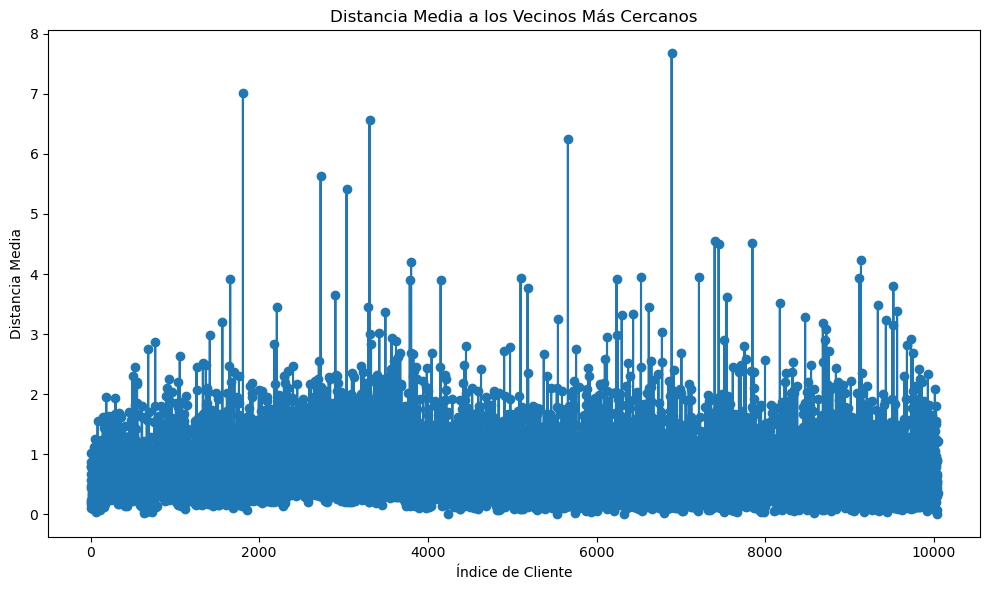


Segmentos de Clientes:
segmento_nombre
Clientes Estables      4600
Clientes Cautelosos    3159
Clientes Rentables     2286
Name: count, dtype: int64

Resumen de Segmentos:


,age,balance,campaign,pdays,previous,duration,tasa_aceptacion
segmento,,,,,,,
0,-0.01,0.02,0.07,-0.43,-0.32,381.98,0.52
1,-0.02,-0.09,0.05,-0.48,-0.36,375.89,0.28
2,0.05,0.08,-0.22,1.53,1.14,350.31,0.65



Guardando el dataframe con los segmentos en 'clientes_segmentados.csv'...
Archivo guardado exitosamente.


In [4]:

df_encoded = df.copy()
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Escalar variables numéricas
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop(['day', 'duration'])
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['segmento'] = kmeans.fit_predict(df_encoded[num_cols])

# Resumen por segmento
segment_summary = df_encoded.groupby('segmento').agg({
    'age': 'mean',
    'balance': 'mean',
    'campaign': 'mean',
    'pdays': 'mean',
    'previous': 'mean',
    'duration': 'mean',
    'deposit': lambda x: (x == 'yes').mean()
}).rename(columns={'deposit': 'tasa_aceptacion'})

segment_summary = segment_summary.round(2)

# Radar chart
features = ['age', 'balance', 'campaign', 'pdays', 'previous', 'duration', 'tasa_aceptacion']
scaled_data = MinMaxScaler().fit_transform(segment_summary[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)
scaled_df['segmento'] = segment_summary.index

# Radar chart plot
labels = features.copy()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
labels += labels[:1]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
for i, row in scaled_df.iterrows():
    values = row[features].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Segmento {int(row["segmento"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])
ax.set_title('Comparación de Segmentos de Clientes')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

# PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded[num_cols])
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['segmento'] = df_encoded['segmento']
# Visualización de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='segmento', palette='viridis', alpha=0.7)
plt.title('PCA de Segmentos de Clientes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_encoded[num_cols])
# Añadir etiquetas de DBSCAN al dataframe
df_encoded['dbscan_segmento'] = dbscan_labels
# Resumen por segmento DBSCAN
dbscan_summary = df_encoded.groupby('dbscan_segmento').agg({
    'age': 'mean',
    'balance': 'mean',
    'campaign': 'mean',
    'pdays': 'mean',
    'previous': 'mean',
    'duration': 'mean',
    'deposit': lambda x: (x == 'yes').mean()
}).rename(columns={'deposit': 'tasa_aceptacion'})
dbscan_summary = dbscan_summary.round(2)
# Visualización de segmentos DBSCAN
pca_df['dbscan_segmento'] = df_encoded['dbscan_segmento'].values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='dbscan_segmento', palette='viridis', alpha=0.7)
plt.title('Segmentos de Clientes con DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Segmento DBSCAN')
plt.tight_layout()
plt.show()
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(df_encoded[num_cols])
# Añadir etiquetas de Agglomerative Clustering al dataframe
df_encoded['agglo_segmento'] = agglo_labels
# Resumen por segmento Agglomerative Clustering
agglo_summary = df_encoded.groupby('agglo_segmento').agg({
    'age': 'mean',
    'balance': 'mean',
    'campaign': 'mean',
    'pdays': 'mean',
    'previous': 'mean',
    'duration': 'mean',
    'deposit': lambda x: (x == 'yes').mean()
}).rename(columns={'deposit': 'tasa_aceptacion'})
agglo_summary = agglo_summary.round(2)
# Añadir etiquetas de Agglomerative Clustering al dataframe de PCA
pca_df['agglo_segmento'] = df_encoded['agglo_segmento'].values
# Visualización de segmentos Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='agglo_segmento', palette='viridis', alpha=0.7)
plt.title('Segmentos de Clientes con Agglomerative Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Segmento Agglomerative')
plt.tight_layout()
plt.show()
# Comparación de resultados de clustering
print("\nResumen de Segmentos KMeans:")
display(segment_summary)
print("\nResumen de Segmentos DBSCAN:")
display(dbscan_summary)
print("\nResumen de Segmentos Agglomerative Clustering:")
display(agglo_summary)
# Evaluación de la calidad del clustering
silhouette_kmeans = silhouette_score(df_encoded[num_cols], df_encoded['segmento'])
silhouette_dbscan = silhouette_score(df_encoded[num_cols], df_encoded['dbscan_segmento'])
silhouette_agglo = silhouette_score(df_encoded[num_cols], df_encoded['agglo_segmento'])
print(f"\nSilhouette Score KMeans: {silhouette_kmeans:.4f}")
print(f"Silhouette Score DBSCAN: {silhouette_dbscan:.4f}")
print(f"Silhouette Score Agglomerative Clustering: {silhouette_agglo:.4f}")
# Análisis de vecinos más cercanos para determinar el número óptimo de clusters
nbrs = NearestNeighbors(n_neighbors=5).fit(df_encoded[num_cols])
distances, indices = nbrs.kneighbors(df_encoded[num_cols])
# Calcular la distancia media a los vecinos más cercanos
mean_distances = np.mean(distances, axis=1)
# Graficar la distancia media a los vecinos más cercanos
plt.figure(figsize=(10, 6))
plt.plot(mean_distances, marker='o')
plt.title('Distancia Media a los Vecinos Más Cercanos')
plt.xlabel('Índice de Cliente')
plt.ylabel('Distancia Media')
plt.tight_layout()
plt.show()
# Guardar el dataframe con los segmentos
segment_labels = {
    0: "Clientes Estables",
    1: "Clientes Cautelosos",
    2: "Clientes Rentables"
}
df_encoded['segmento_nombre'] = df_encoded['segmento'].map(segment_labels)
print("\nSegmentos de Clientes:")
print(df_encoded['segmento_nombre'].value_counts())
# ver resumen de segmentos
print("\nResumen de Segmentos:")
display(segment_summary)
# Guardar el dataframe con los segmentos en un archivo CSV
print("\nGuardando el dataframe con los segmentos en 'clientes_segmentados.csv'...")


df_encoded.to_csv('../Data/clientes_segmentados.csv', index=False)
print("Archivo guardado exitosamente.")

# Cargar segmento obteniods

In [9]:
# cargar el dataframe con los segmentos
def cargar_datos_limpios():
    # Cargar el dataframe limpio desde un archivo CSV
    df = pd.read_csv('../Data/clientes_segmentados.csv')
    return df


# otras pruebas realizadas no correr

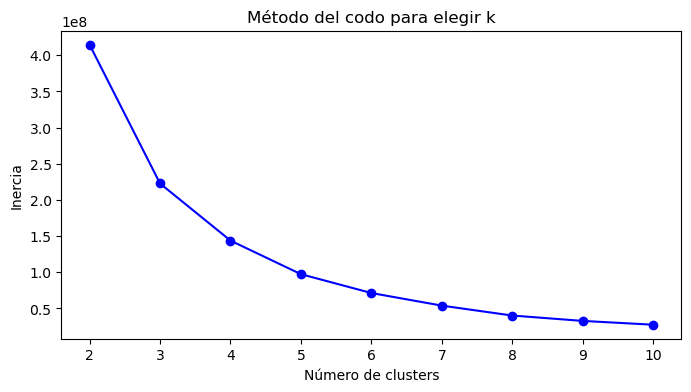

El mejor número de clusters según el método del codo es: 3
segmento
0    6930
1    2419
2     696
Name: count, dtype: int64


In [24]:
# Segmentación de clientes usando KMeans

# 1. Codificar variables categóricas
df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include=['object'])  # Excluir variable objetivo
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2. Escalar variables numéricas
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# 3. Seleccionar número óptimo de clusters usando el método del codo
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para elegir k')
plt.show()

# Mostrar el número óptimo de clusters según el método del codo
k_codo = K[np.argmin(np.diff(inertia)) + 1]
print(f"El mejor número de clusters según el método del codo es: {k_codo}")

# 4. Ajustar KMeans con el número óptimo de clusters 
k_opt = k_codo
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['segmento'] = kmeans.fit_predict(df_scaled)

# Mostrar la cantidad de clientes por segmento
print(df['segmento'].value_counts())

In [10]:
# Método de la Silueta para encontrar el número óptimo de clusters
# Nos aseguramos de que df_scaled esté definido y sea un DataFrame numérico
# df_scaled ya está definido en celdas anteriores y contiene los datos escalados necesarios
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(list(K), silhouette_scores, 'ro-')
plt.xlabel('Número de clusters')
plt.ylabel('Score de Silueta')
plt.title('Método de la Silueta para elegir k')
plt.show()

# Mostrar el número óptimo según el mayor score de silueta
best_k = list(K)[np.argmax(silhouette_scores)]
print(f"El mejor número de clusters según el método de la silueta es: {best_k}")

NameError: name 'K' is not defined

# Estimar tasa de conversión por segmento


Tasa de conversión por segmento:
deposit   tasa_conversion
segmento                 
0                0.521087
1                0.282684
2                0.649169


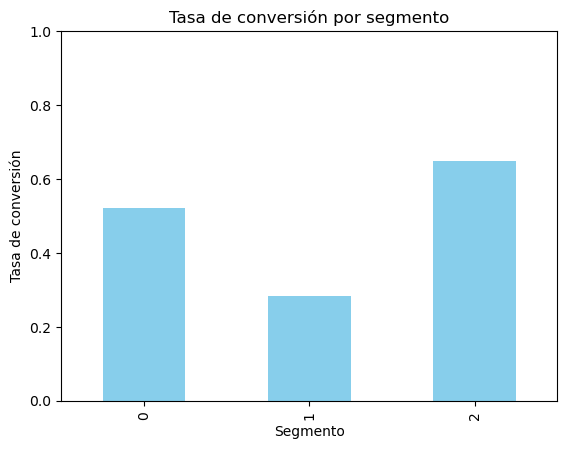

In [12]:
# Calcular la tasa de conversión por segmento
df_segmented = cargar_datos_limpios()
conversion_rates = df_segmented.groupby('segmento')['deposit'].value_counts(normalize=True).unstack().fillna(0)
conversion_rates['tasa_conversion'] = conversion_rates['yes'] if 'yes' in conversion_rates.columns else 0

print("Tasa de conversión por segmento:")
print(conversion_rates[['tasa_conversion']])

# Visualización de la tasa de conversión por segmento
conversion_rates['tasa_conversion'].plot(kind='bar', color='skyblue')
plt.xlabel('Segmento')
plt.ylabel('Tasa de conversión')
plt.title('Tasa de conversión por segmento')
plt.ylim(0, 1)
plt.show()

# Planteamiento de objetivos analíticos (retención, respuesta, valor esperado)

Retención por segmento (proporción de clientes actuales):
segmento
0    0.521087
1    0.282684
2    0.649169
Name: deposit, dtype: float64

Tasa de respuesta por segmento (tasa de conversión):
segmento
0    0.521087
1    0.282684
2    0.649169
Name: tasa_conversion, dtype: float64

Valor esperado por segmento (estimación):
segmento
0    2397000.0
1     893000.0
2    1484000.0
dtype: float64


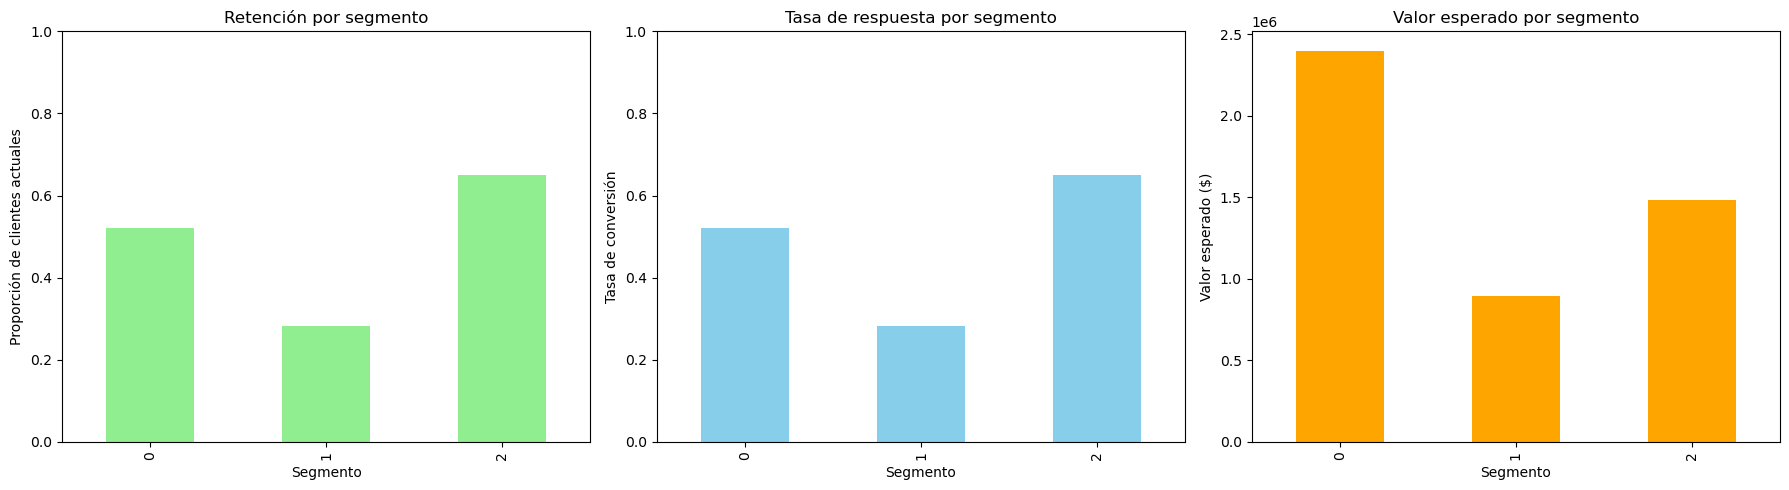

In [14]:
# Planteamiento de objetivos analíticos

# 1. Retención: Analizar la proporción de clientes que ya son clientes (deposit == 'yes') en cada segmento.
retencion_por_segmento = df_segmented.groupby('segmento')['deposit'].apply(lambda x: (x == 'yes').mean())
print("Retención por segmento (proporción de clientes actuales):")
print(retencion_por_segmento)

# 2. Respuesta: Analizar la tasa de respuesta a la campaña (ya calculada como tasa_conversion).
print("\nTasa de respuesta por segmento (tasa de conversión):")
print(conversion_rates['tasa_conversion'])

# 3. Valor esperado: Supongamos que el valor esperado por cliente es proporcional a la tasa de conversión.
# Si tuvieras un valor monetario por conversión, podrías multiplicar por la tasa de conversión y el tamaño del segmento.
valor_monetario = 1000  # Ejemplo: valor esperado por conversión
clientes_por_segmento = df_segmented['segmento'].value_counts().sort_index()
valor_esperado = conversion_rates['tasa_conversion'] * clientes_por_segmento * valor_monetario

print("\nValor esperado por segmento (estimación):")
print(valor_esperado)

# Visualización de los objetivos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

retencion_por_segmento.plot(kind='bar', ax=axs[0], color='lightgreen')
axs[0].set_title('Retención por segmento')
axs[0].set_xlabel('Segmento')
axs[0].set_ylabel('Proporción de clientes actuales')
axs[0].set_ylim(0, 1)

conversion_rates['tasa_conversion'].plot(kind='bar', ax=axs[1], color='skyblue')
axs[1].set_title('Tasa de respuesta por segmento')
axs[1].set_xlabel('Segmento')
axs[1].set_ylabel('Tasa de conversión')
axs[1].set_ylim(0, 1)

valor_esperado.plot(kind='bar', ax=axs[2], color='orange')
axs[2].set_title('Valor esperado por segmento')
axs[2].set_xlabel('Segmento')
axs[2].set_ylabel('Valor esperado ($)')

plt.tight_layout()
plt.show()

##  KPIs Clave para Evaluar la Eficiencia de las Campañas

Los siguientes indicadores permiten evaluar el impacto de la segmentación y tomar decisiones basadas en datos para campañas de captación de clientes:

| KPI                         | Fórmula / Definición                                                                 | Objetivo | Nivel de Análisis         |
|----------------------------|---------------------------------------------------------------------------------------|----------|----------------------------|
| **Tasa de Conversión**     | Clientes que aceptaron / Contactados                                                 | ↑        | Por cliente / segmento     |
| **Valor Esperado (VEC)**   | Probabilidad de aceptación × (300 - 10 - 0.5 × duración)                             | ↑        | Por cliente / segmento     |
| **Duración Promedio**      | Tiempo medio (minutos) de llamada por segmento                                      | ↓        | Por segmento               |
| **Retorno Estimado (ROI)** | Ganancia esperada / Costo total por segmento                                        | ↑        | Por segmento               |
| **Tasa de Contactabilidad**| Contactos exitosos / Intentos totales (si aplica)                                   | ↑        | (opcional, si hay datos)   |
| **Customer Lifetime Value**| Valor total esperado del cliente a largo plazo (requiere historial adicional)        | ↑        | (avanzado, opcional)       |

> Estos KPIs permiten al equipo de marketing **priorizar segmentos**, **optimizar recursos** y **maximizar el retorno de inversión (ROI)** en cada campaña.

En próximos sprints, estos indicadores serán visualizados en dashboards para facilitar la toma de decisiones estratégicas.
